## Step 1. 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['default'])

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import FinanceDataReader as fdr

import warnings
warnings.filterwarnings(action='ignore')


In [16]:
df = fdr.DataReader('GOOGL', '2010')
df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-01-04,313.68,313.78,315.06,312.42,1960000.0,0.0109
2010-01-05,312.30,313.89,314.22,311.07,3010000.0,-0.0044
2010-01-06,304.43,313.23,313.23,303.47,3980000.0,-0.0252
2010-01-07,297.34,305.00,305.30,296.61,6420000.0,-0.0233
2010-01-08,301.30,296.29,301.92,294.84,4720000.0,0.0133
...,...,...,...,...,...,...
2022-01-03,2899.83,2901.10,2917.02,2874.25,1410000.0,0.0010
2022-01-04,2887.99,2907.92,2929.70,2874.32,1380000.0,-0.0041
2022-01-05,2755.50,2888.40,2889.99,2753.76,2680000.0,-0.0459


## Step 2. 종가 데이터

### 2-1. 차트 시각화

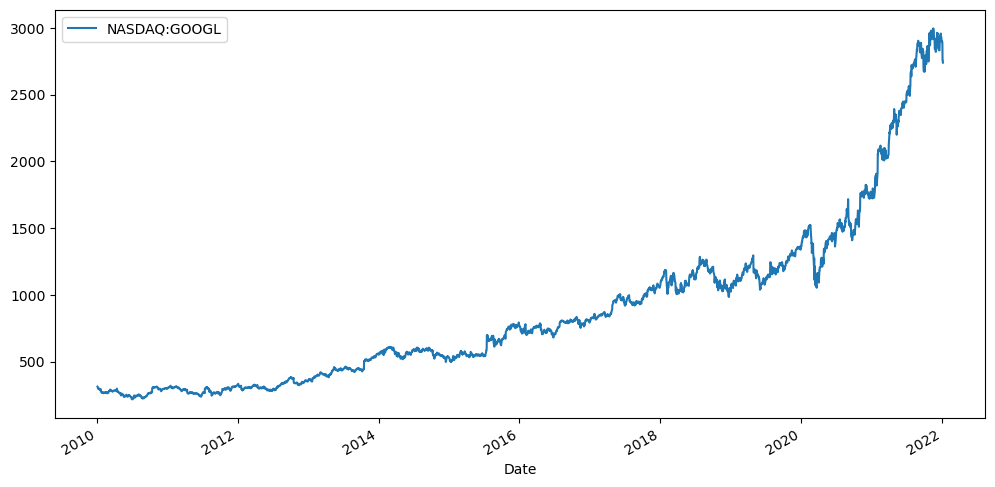

In [19]:
df['Close'].plot(figsize=(12,6), label='NASDAQ:GOOGL')

plt.legend()
plt.show()

### 2-2. 자기상관성

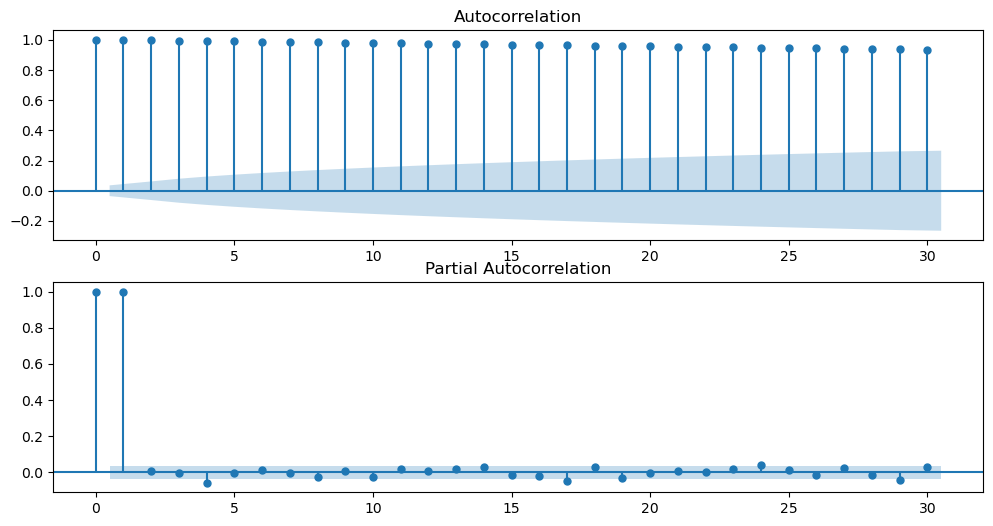

In [23]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Close'], lags=30, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Close'], lags=30, ax=ax2)
plt.show()

## Step 3. 차분 데이터

### 3-1. 자기상관성

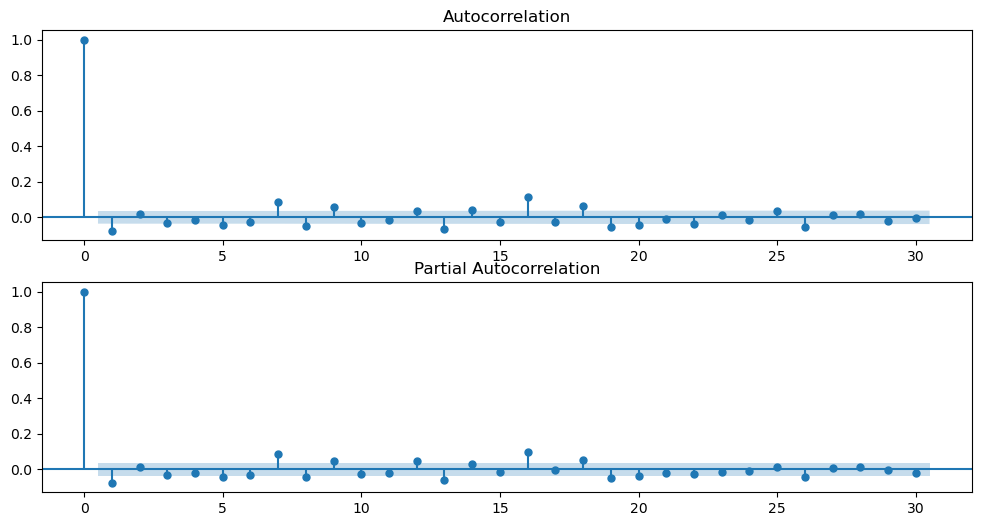

In [25]:
df_diff = df['Close'].diff().dropna()

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_diff, lags=30, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_diff, lags=30, ax=ax2)
plt.show()

### 3-2. 정상성

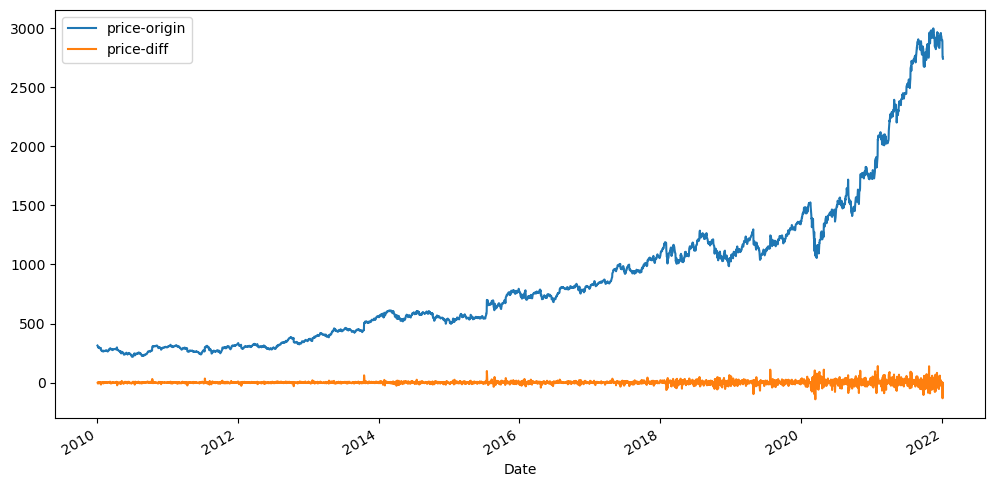

In [26]:
plt.figure(figsize=(12,6))

df['Close'].plot(label='price-origin')
df_diff.plot(label='price-diff')

plt.legend()
plt.show()

- 하루하루의 가격 변화는 랜덤
- 누적되면서 추세를 만들면 추세따라 예측이 가능하지만, 랜덤으로 만들어지는 추세는 후행지표이므로 추세를 학습하는 알고리즘은 후행지표를 따라가는꼴

In [28]:
def check_stationarity(series):
    res = adfuller(series.values)
    
    print(f'ADF Statistic: {res[0]}')
    print(f'p-value : {res[1]}')
    print(f'Critical Value : \
                            \n\t(1%) {res[4]["1%"]}\
                            \n\t(5%) {res[4]["5%"]}\
                            \n\t(10%) {res[4]["10%"]}')

In [30]:
check_stationarity(df_diff)

ADF Statistic: -11.716135722652508
p-value : 1.449770537841058e-21
Critical Value :                             
	(1%) -3.4325272764323667                            
	(5%) -2.862501980355106                            
	(10%) -2.567282087313508
